In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson


#Grab data and put numerical vals in one table
#################################################################################################################
dataset_as_given = pd.read_csv(r"d:\Desktop\Practice Python\21.gym_members_exercise_tracking.csv")
#print(dataset_as_given)

# Get column names
column_names = dataset_as_given.columns
#print(column_names)

desired = ["Age", "Weight (kg)", "Height (m)", "Max_BPM", "Avg_BPM", "Resting_BPM", 
           "Session_Duration (hours)", "Calories_Burned", "Fat_Percentage", "Water_Intake (liters)", "Workout_Frequency (days/week)", "Experience_Level", "BMI"]

dataset_as_given_numeric = dataset_as_given[desired]



#Get Rid of Outliers
#################################################################################################################

# Copy the dataset so you keep the original intact
cleaned_df = dataset_as_given.copy()

# Select numeric columns
numeric_cols = cleaned_df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    Q1 = cleaned_df[col].quantile(0.25)
    Q3 = cleaned_df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]



print("Original rows:", dataset_as_given.shape[0])
print("Cleaned rows:", cleaned_df.shape[0])
print("Rows removed:", dataset_as_given.shape[0] - cleaned_df.shape[0])


#################################################################################################################

encoded_df = cleaned_df.copy()

encoded_df['Gender'] = encoded_df['Gender'].map({
    'Male': 1,
    'Female': 0
})

workout_dummies = pd.get_dummies(encoded_df['Workout_Type'], prefix='Workout', drop_first=True)
encoded_df = pd.concat([encoded_df.drop(columns=['Workout_Type']), workout_dummies], axis=1)




Original rows: 973
Cleaned rows: 931
Rows removed: 42


Splitting a dataset for machine learning models comes in as a crucial step in the version impovement process.<br>
There are a few different ways in which a dataset can be split to be readied for machine learning<br><br>

1. Train-Test Split<br>
In this case the dataset would be divided into a training set (educating set) and a trying out set. The educating set is used to educate (or train) the model. The trying out set is used to test the model/assess the model's overall performance. Normally, 70 to 80 % of the dataset is used for training while the remaining of 20 to 30 % is used to assess the capabilites of the model. These precentages may vary, depending on the size of the dataset.<br><br>

2. Train-Validation-Test Split<br>
In this case the dataset is divided into 3 subsets. A schooling set, a validation set, and a trying out set. The training set is used to train the model. The validation set is used to tune hyperparameteres and validate the performance of the overall model. The testing set is used to evaluate the very last version of the model for its performance.<br><br>

3. K-fold Cross Validation<br>
The dataset is divided into k folds and the model is trained and validated over the k instances. Each time, a fold is used for training and another one is used for validating purposes. This can produce greater overall performance, estimates, and reduces the variance in version evaluation.<br><br>

4. Stratified Sampling<br>
In this case the distribution of the training and otger features of the model is retained in the training and testing phases. This type of split is good when dealing with unbalanced datasets or a small amount of samples.<br><br>

5. Time-primarily used split<br>
This tipe of split is used when using time collection facts, which can consists of things such as stock costs or weather statistics. The dataset gets cut regurarly into training and testing dataset based on a chronological order. This enables us to see how the model performs on future unseen facts.<br><br>

https://www.geeksforgeeks.org/machine-learning/splitting-data-for-machine-learning-models/



In [2]:
# ============================================================
#   TRAIN/TEST SPLIT + SCALING
#   This prepares your data for any ML model
# ============================================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ------------------------------------------------------------
# 1. Define X (features) and y (target)
# ------------------------------------------------------------
# Gender must already be encoded as 0/1 in encoded_df
X = encoded_df.drop(columns=['Gender'])
y = encoded_df['Gender']

# ------------------------------------------------------------
# 2. Train/Test Split
# ------------------------------------------------------------
# test_size=0.2 means 20% of data is held out for testing
# random_state=42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------------------------------------
# 3. Scale the numeric features
# ------------------------------------------------------------
# Scaling helps models like Logistic Regression, SVM, KNN, Neural Networks
# Tree-based models (Random Forest, XGBoost) do NOT require scaling,
# but scaling does not harm them.
scaler = StandardScaler()

# Fit on training data ONLY, then transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------------
# 4. Optional: Print shapes to confirm everything looks right
# ------------------------------------------------------------
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

print("\nScaled versions created: X_train_scaled, X_test_scaled")


X_train shape: (744, 16)
X_test shape: (187, 16)
y_train shape: (744,)
y_test shape: (187,)

Scaled versions created: X_train_scaled, X_test_scaled


In [4]:
# ============================================================
# SUPPORT VECTOR MACHINE (SVM)
# Excellent for binary classification. Works best with scaling.
# Look for high accuracy and strong separation between classes.
# ============================================================

from sklearn.svm import SVC

svm_model = SVC(probability=True)  # probability=True needed for ROC curves
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.9572192513368984


Accuracy: 0.9572

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        94
           1       0.95      0.97      0.96        93

    accuracy                           0.96       187
   macro avg       0.96      0.96      0.96       187
weighted avg       0.96      0.96      0.96       187



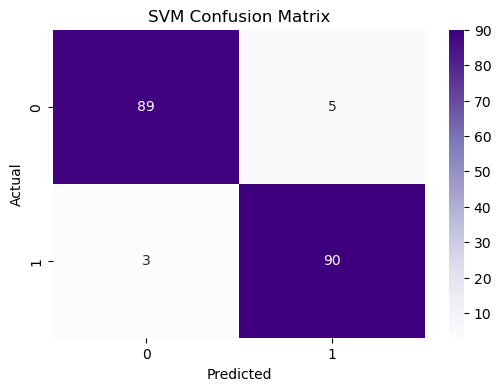

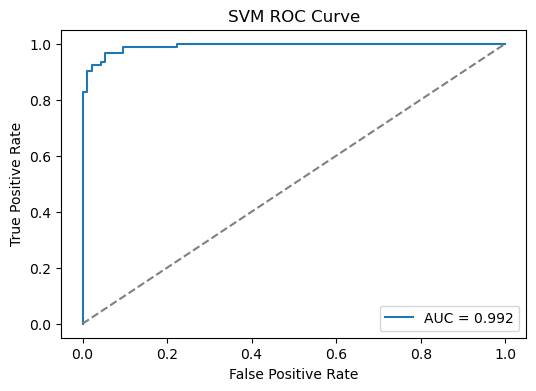

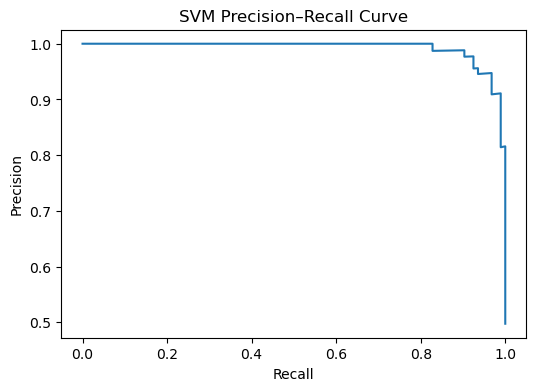


Number of Support Vectors: 260
Support Vectors per Class: [126 134]


In [14]:
# ============================================================
#   SUPPORT VECTOR MACHINE (SVM) — FULL MODEL EVALUATION
#   This cell trains the SVM model and evaluates it using:
#     ✔ Accuracy
#     ✔ Classification Report
#     ✔ Confusion Matrix
#     ✔ ROC Curve + AUC
#     ✔ Precision–Recall Curve
#     ✔ Support Vectors (unique to SVM)
#   Every section includes comments explaining what to look for.
# ============================================================

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)
import pandas as pd

# ------------------------------------------------------------
# 1. Train the SVM model
# ------------------------------------------------------------
# SVM works best with scaled data.
# probability=True allows us to compute ROC and PR curves.
svm_model = SVC(probability=True, kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_scaled)
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]


# ------------------------------------------------------------
# 2. Accuracy Score
# ------------------------------------------------------------
# Accuracy = proportion of correct predictions.
# SVM often performs very well on binary classification.
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy:.4f}")


# ------------------------------------------------------------
# 3. Classification Report
# ------------------------------------------------------------
# Shows precision, recall, and F1-score for each class.
# Look for balanced values across both classes.
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


# ------------------------------------------------------------
# 4. Confusion Matrix
# ------------------------------------------------------------
# Shows EXACTLY where the model is making mistakes.
# Diagonal = correct predictions.
# Off-diagonal = errors.
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# ------------------------------------------------------------
# 5. ROC Curve + AUC Score
# ------------------------------------------------------------
# ROC curve shows how well the model separates the two classes.
# AUC close to 1.0 = excellent.
fpr, tpr, thresholds = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='grey')
plt.title("SVM ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


# ------------------------------------------------------------
# 6. Precision–Recall Curve
# ------------------------------------------------------------
# Useful when one class is less common.
# Look for curves that stay high (good precision)
# and far right (good recall).
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_svm)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.title("SVM Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


# ------------------------------------------------------------
# 7. SVM Support Vectors (unique to SVM)
# ------------------------------------------------------------
# Support vectors are the data points closest to the decision boundary.
# Fewer support vectors = simpler, more generalisable model.
# Many support vectors = more complex model.
num_support_vectors = svm_model.support_.shape[0]
print(f"\nNumber of Support Vectors: {num_support_vectors}")

# Breakdown per class
print("Support Vectors per Class:", svm_model.n_support_)
